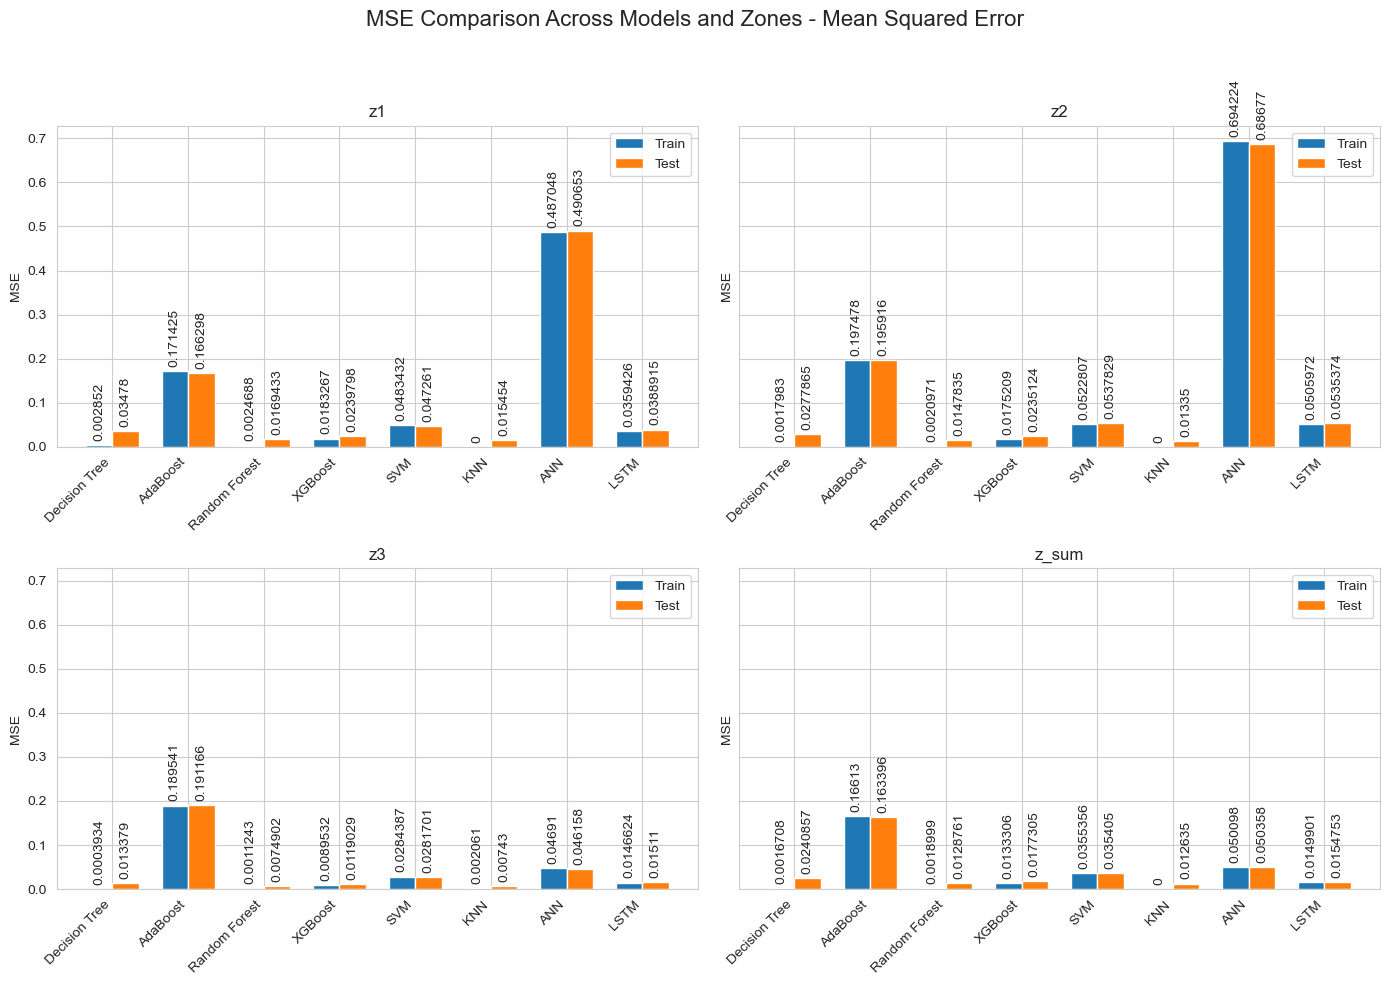

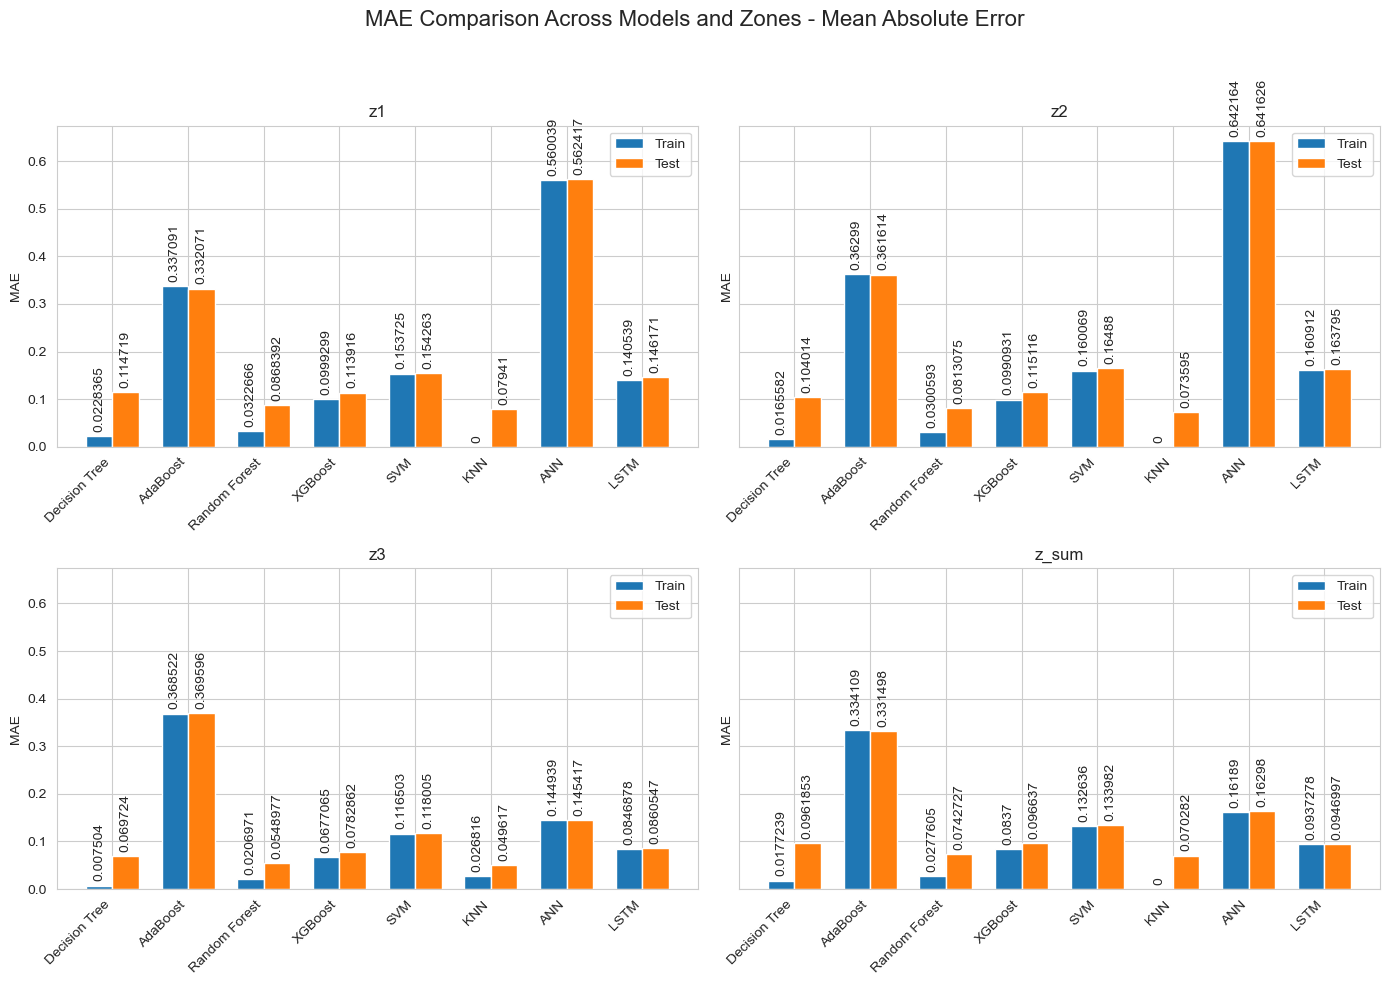

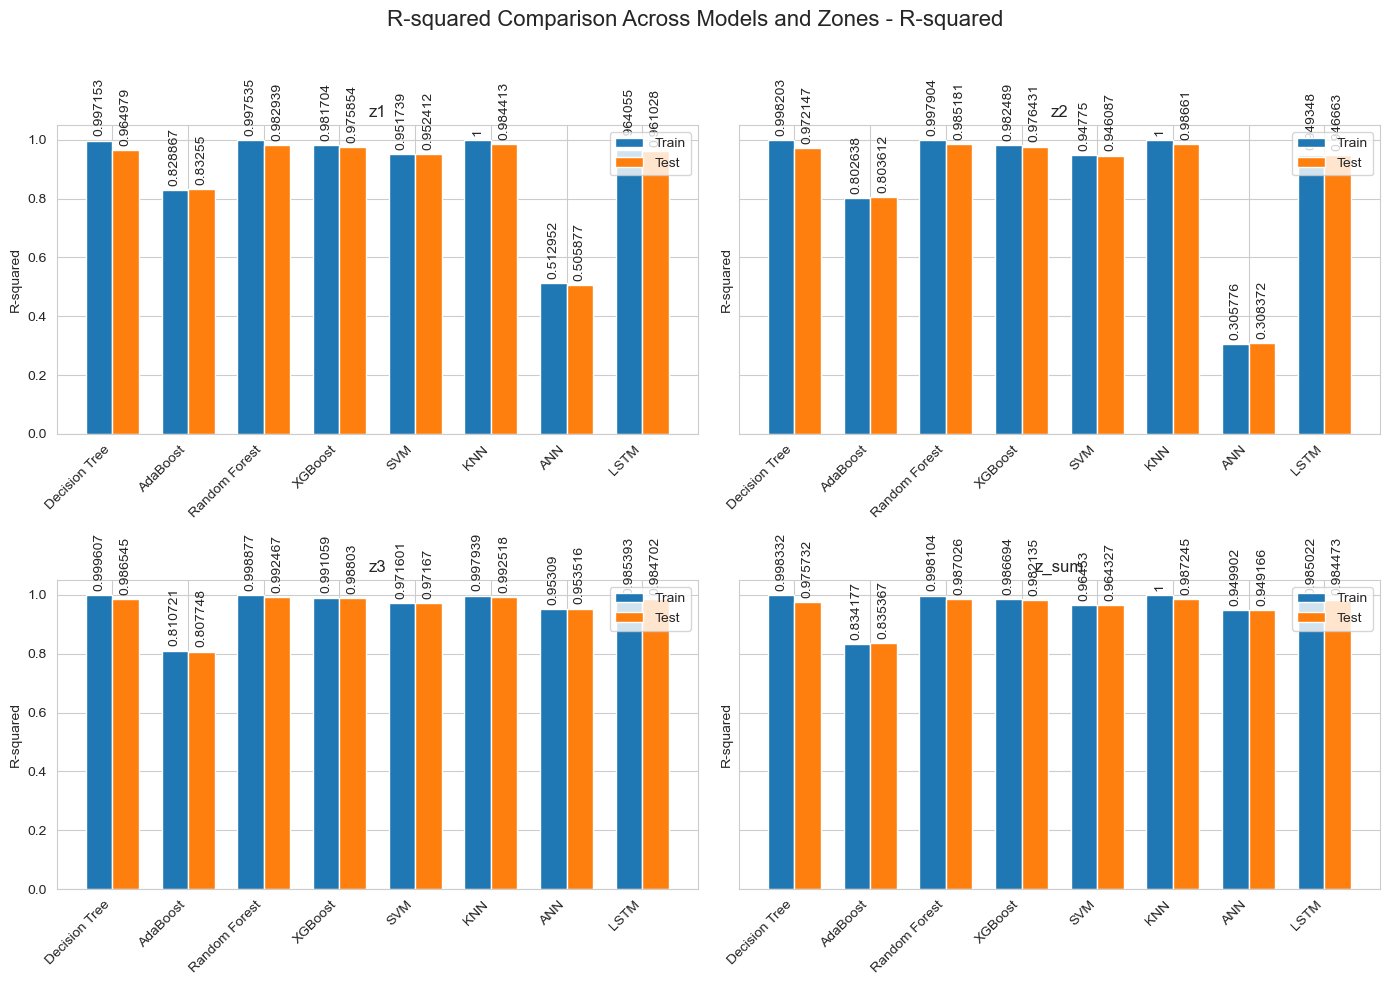

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plots
models = ['Decision Tree', 'AdaBoost', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'ANN', 'LSTM']
zones = ['z1', 'z2', 'z3', 'z_sum']

# MSE, MAE, R-squared values for each model and zone (example data)
mse_train = {
    'z1': [0.0028520, 0.1714247, 0.0024688, 0.0183267, 0.0483432, 0.000000, 0.487048, 0.035942639260609956],
    'z2': [0.0017983, 0.1974783, 0.0020971, 0.0175209, 0.0522807, 0.000000, 0.694224, 0.0505972289898979],
    'z3': [0.0003934, 0.1895407, 0.0011243, 0.0089532, 0.0284387, 0.002061, 0.046910, 0.014662362841445177],
    'z_sum': [0.0016708, 0.1661304, 0.0018999, 0.0133306, 0.0355356, 0.0000, 0.050098, 0.014990085600955853]
}

mse_test = {
    'z1': [0.0347800, 0.1662985, 0.0169433, 0.0239798, 0.0472610, 0.015454, 0.490653, 0.03889153254677635],
    'z2': [0.0277865, 0.1959156, 0.0147835, 0.0235124, 0.0537829, 0.013350, 0.686770, 0.05353735937886586],
    'z3': [0.0133790, 0.1911657, 0.0074902, 0.0119029, 0.0281701, 0.00743, 0.046158, 0.015110029246488074],
    'z_sum': [0.0240857, 0.1633957, 0.0128761, 0.0177305, 0.0354050, 0.012635, 0.050358, 0.01547533443989509]
}

mae_train = {
    'z1': [0.0228365, 0.3370912, 0.0322666, 0.0999299, 0.1537248, 0.000000, 0.560039, 0.1405392680392396],
    'z2': [0.0165582, 0.3629895, 0.0300593, 0.0990931, 0.1600692, 0.000000, 0.642164, 0.1609115853867787],
    'z3': [0.0075040, 0.3685225, 0.0206971, 0.0677065, 0.1165033, 0.026816, 0.144939, 0.08468775128967168],
    'z_sum': [0.0177239, 0.3341094, 0.0277605, 0.0837000, 0.1326365, 0.0000, 0.161890, 0.09372776330500866]
}

mae_test = {
    'z1': [0.1147187, 0.3320713, 0.0868392, 0.1139155, 0.1542629, 0.079410, 0.562417, 0.14617070697079027],
    'z2': [0.1040139, 0.3616136, 0.0813075, 0.1151165, 0.1648802, 0.073595, 0.641626, 0.1637946864816426],
    'z3': [0.0697240, 0.3695961, 0.0548977, 0.0782862, 0.1180050, 0.049617, 0.145417, 0.08605469909614372],
    'z_sum': [0.0961853, 0.3314977, 0.0742727, 0.0966370, 0.1339823, 0.070282, 0.162980, 0.09469972778612513]
}

r2_train = {
    'z1': [0.9971529, 0.8288666, 0.9975354, 0.9817045, 0.9517390, 1.000000, 0.512952, 0.9640546695987076],
    'z2': [0.9982027, 0.8026375, 0.9979041, 0.9824894, 0.9477500, 1.000000, 0.305776, 0.9493483365332092],
    'z3': [0.9996072, 0.8107214, 0.9988772, 0.9910592, 0.9716006, 0.997939, 0.953090, 0.9853925765971163],
    'z_sum': [0.9983323, 0.8341774, 0.9981036, 0.9866940, 0.9645302, 1.0000, 0.949902, 0.9850219787096547]
}

r2_test = {
    'z1': [0.9649792, 0.8325503, 0.9829394, 0.9758542, 0.9524118, 0.984413, 0.505877, 0.9610279900817328],
    'z2': [0.9721465, 0.8036118, 0.9851809, 0.9764309, 0.9460874, 0.986610, 0.308372, 0.9466633657040237],
    'z3': [0.9865450, 0.8077483, 0.9924672, 0.9880295, 0.9716699, 0.992518, 0.953516, 0.984702161024509],
    'z_sum': [0.9757318, 0.8353665, 0.9870263, 0.9821352, 0.9643268, 0.987245, 0.949166, 0.9844728809982438]
}

metrics = ['MSE', 'MAE', 'R-squared']

# Function to plot bar plots
def plot_bar(metric, data_train, data_test, title):
    x = np.arange(len(models))  # Label locations
    width = 0.35  # Width of the bars

    fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
    fig.suptitle(f'{metric} Comparison Across Models and Zones - {title}', fontsize=16)

    for i, zone in enumerate(zones):
        ax = axs[i // 2, i % 2]
        rects1 = ax.bar(x - width/2, data_train[zone], width, label='Train')
        rects2 = ax.bar(x + width/2, data_test[zone], width, label='Test')

        ax.set_ylabel(f'{metric}')
        ax.set_title(f'{zone}')
        ax.set_xticks(x)
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.legend()

        ax.bar_label(rects1, padding=3, rotation=90)
        ax.bar_label(rects2, padding=3, rotation=90)

    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plotting each metric
plot_bar('MSE', mse_train, mse_test, 'Mean Squared Error')
plot_bar('MAE', mae_train, mae_test, 'Mean Absolute Error')
plot_bar('R-squared', r2_train, r2_test, 'R-squared')

